--- Daniel Maidment---
$\renewcommand{\vec}{\mathbf}$
$\newcommand{\x}{\vec{x}}$
$\newcommand{\X}{\vec{X}}$
$\newcommand{\s}{\vec{s}}$
$\renewcommand{\phi}{\varphi}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\y}{\vec{y}}$
$\renewcommand{\v}{\vec{v}}$
$\newcommand{\A}{\vec{A}}$
$\newcommand{\I}{\vec{I}}$
$\newcommand{\z}{\vec{z}}$
$\newcommand{\a}{\vec{a}}$
$\newcommand{\b}{\vec{b}}$
$\newcommand{\t}{\vec{t}}$
$\newcommand{\W}{\vec{W}}$
$\newcommand{\w}{\;\!}$
$\newcommand{\l}{\w\left(l\right)}$
$\newcommand{\th}{\text{th}}$
$\newcommand{\(}{\left (}$
$\newcommand{\)}{\right )}$

# Feed-forward neural networks

Feed-forward neural networks (FFNNs), deep feed-forward neural networks, or multilayer preceptrons (MLPs) are machine learning models that attempt to approximate some function; mapping inputs to outputs. 
The typical FFNN is structured such that each layer contains a series of inputs which are carried through weighted synapses \cite{bishop_pattern_2006}. This can be represented analytically as the inner product of the input vector $\a^{\l}$ with the weight matrix $\W^{\l}$ such that $\z^{\w\left(l+1\right)} = \W^{\l}\cdot{\a^{\l}}$; where the superscript $l$ indicates the layer of the network. Here $\z^{\l}$ is the summed output of the synapses for a given layer, after which $\z^{\l}$ is then passed through a non-linear activation function where $a^{\l}_j = f\left(z^{\l}_j\right)$ \cite{goodfellow_deep_2016}. The input to the neural network is the vector $\x=\a^0$. The output vector $\y$ is dependent on the classification technique.

![]( images/Diagrams/feed_forward_neural_net.png)\label{fig:ffnn}
##### A simple fully connected neural network

## Activation functions

The activation function serves the purpose of forcing the successive layers of the neural network to be linearly independent. There is also normally a normalising component to the activation functions in that large input values are saturated to some limiting value while small input values have an almost linear transfer characteristic. This can be seen in fig.~\ref{fig:common_activation_functions}, where the sigmoid function saturates between 0 and 1, while the hyperbolic tangent function is asymptotic about 1 and -1. This is thought to mimic the behaviour of neurons where there is some maximum spiking rate, and some minimum spiking rate ***citation needed***.

Some common activation functions include the sigmoid function:

\begin{equation}
        \sigma({x}) =\frac{1}{1+e^{-{x}}}.
\end{equation}
or the hyperbolic tangent function:
\begin{equation}
    f({x}) =\tanh{({x})}.
\end{equation}
or the rectified linear unit function (ReLU):
\begin{equation}
    ReLU({x}) = \left\{
            \begin{array}{ll}
                0 & \quad {x} < 0 \\
                {x} & \quad {x} \geq 0.
            \end{array}
        \right.
\end{equation}
There are many varieties of activation function that satisfy different problems, but the choice of activation function is largely empirical.

<img src="images/common_activation_functions.png" alt="Some common activation functions"
	title="Some common activation functions." width="600" height="400" />\label{fig:common_activation_functions}
##### Some common activation functions.

The sigmoid function is an early attempt to model neurons, it is problematic however in that it is computationally very expensive; this is also true for function likes the hyperbolic tangent function***citation needed***. The ReLU function is relatively new and while simple appears to have few draw-backs in terms of learning, but it does however specifically improve computational performance as positive input values have a linear transfer function, and everything else is zero.

## Synaptic connections

Synapses are very simplistically modeled as weights. In a brain the synaptic learning rule is approximated by what is called a Hebian learning rule, where the weight of the connection between neurons (representing the signal attenuation) is strengthened if neurons fire contemporaneously, and weakened if they fire atemporaneously. In reality the signal decay is complex, with the synapse being akin to dynamic repeaters or specialised neurons in and of themselves. Within feed-forward neural networks, a weight matrix $\W^{\l}$ is the transfer function from one neuron layer to the next, where each element $w_{i\w j}^{\l}$ is the linear dependence of neuron$_i^{\w\left(l+1\right)}$ on neuron$_j^{\l}$ and is often limited to be either an element of $[0,1]$ or $[-1, 1]$.

\begin{equation}
    \z^{(1)} = \W^{(0)}\cdot{\x}
\end{equation}

\begin{equation}
    \a^{(1)} = f\left(\z^{(1)}\right)
\end{equation}

\begin{equation}
    \z^{(2)} = \W^{(1)}\cdot{\a^{(1)}}
\end{equation}

\begin{equation}
    \a^{(2)} = f\left(\z^{(2)}\right)
\end{equation}

\begin{equation}
    \y = \W^{(2)}\cdot{\a^{(2)}}
\end{equation}

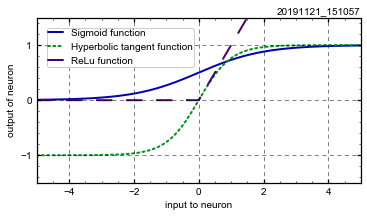

In [8]:
import numpy as np
import spyder_utilities as su
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax = su.config_axis(ax, x_lim=(-5, 5), y_lim=(-1.5, 1.5), Y_0=1, mult_y=1 , Eng=False)
ax.plot(x, 1/(1+np.e**(-x)), linewidth=2, label="Sigmoid function")
ax.plot(x, np.tanh(x), linestyle=':', linewidth=2, label="Hyperbolic tangent function")
ax.plot(x, np.maximum(0, x), linestyle='--', linewidth=2, label="ReLu function")
ax.set_xlabel("input to neuron")
ax.set_ylabel("output of neuron")
ax.legend()
plt.show()
su.save_fig(fig,
            image_nm="common_activation_functions",
            paper_format=["pdf", "png"], debug=False)

## Complexity

From a computational perspective, these operations are heavy with multiplications. The complexity of a square $\left[n\times n\right]$ matrix multiplied by a $\left[n\times 1\right]$ matrix is given by $O(n^2)$ \cite{cormen_introduction_2009} (where a multiplication operation is assumed to have a complexity of $O(1)$), and each hidden layer has at least a matrix operation of this kind. The activation function's complexity is at least proportional to $O(\log{n})$. Hence, for every layer of the network $l$ (except the input layer), there is at least a matrix multiplication and at least an activation function. If a given layer has 10 neurons, then the matrix operation has complexity of at least $O(100)$, while a layer of size 100 has complexity of at least $O(10, 000)$. 